# Lab 6.1 Simplified

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Let us define our dataset
features = ['sepal_length', 'petal_length']
    
# just some mock dataset
X = pd.DataFrame([[1, 9], [1, 10], [2, 9.5], [2, 8], [3, 10], [3, 8], [6, 4], [7, 5], [7, 3], 
                      [8, 3], [8, 4], [9, 6], [11, 9], [12, 8], [12.5, 10], [13, 8], [13, 9], [14, 10]], 
                     columns = features)

# the initial centroids was something i took randomly between the lowest and highest values of all the features
# So we have 2 features and 3 centroids --> assuming 3 clusters

#Centroid 0, 1, and 2
centroids = [[1, 3], [12, 5], [2, 5]]   

# Please note that the dimensions of the centroid is dependent on the number of features for this Lab 

e.g. if there are 3 features then the centroid will be [ [x1, y1, z1], [x2,y2,z2], [x3, y3, z3] ]

In [3]:
X.shape

(18, 2)

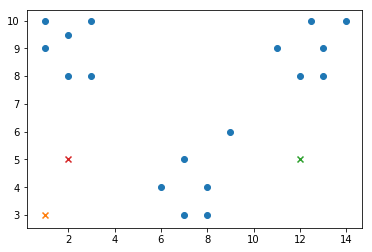

In [4]:
#we plot the data just to see what it looks like
plt.scatter(x = X.sepal_length, y = X.petal_length)

for index1 in range(len(centroids)):
    plt.scatter(x = centroids[index1][0], y = centroids[index1][1], marker = 'x')
    
plt.show()
#The centroids will appear as Xs on the chart


# Let's explore the closest centroid function

In [17]:
def closest_centroid(X, centroids):
    distances = []
    
    p = np.array(X)
    
    for c in centroids:
        
        q = np.array(c)
        
        d = np.sqrt(np.sum((p - q)**2))
        
        distances.append(d)
#     print(distances)
#     print(np.array(distances).argmin())
        
    return np.array(distances).argmin()

In [6]:
#Let explore the function above and see what it does
closest_centroid(np.array(X)[0], centroids)

[6.0, 11.704699910719626, 4.123105625617661]
2


2

So the function closest_centroid takes one data point and the centroid and computes the distance between that single data point
and all the centroids

The **Euclidean distance** between points `p` and `q` is the length of the line segment connecting them ($\overline{pq}$).

In **Cartesian coordinates**, if $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in **Euclidean n-space**, then the distance `d` from `p` to `q`, or from `q` to `p` is given by the **Pythagorean formula**:

$$
{\displaystyle {\begin{aligned}d(\mathbf {p} ,\mathbf {q} )=d(\mathbf {q} ,\mathbf {p} )&={\sqrt {(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}}}\\[8pt]&={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.\end{aligned}}}
$$

Our first data point was [1, 9] and so the distance was computed using the equation above:

distance from centroid 0  = square root((1 - 1)^2 + (3 - 9)^2) = 6.0 
distance from centroid 1 = square root((12 - 1)^2 + (5 - 9)^2) = 11.7046999....
distance from centroid 2 = square root((2 - 1)^2 + (5 - 9)^2) = 4.12310...

giving us the result: [6.0, 11.704699910719626, 4.123105625617661] which is an array of distances from the first data point to all three centroids respectively

then we simply get the index of the array containing the smallest value ergo the shortest distance which is 2

this means that Centroid 2 is closest to data point [1, 9] 

# Now that we know what the closest_centroid function does, let's apply it to all the data points

In [7]:
y = []

for index in np.array(X):
    close_cen = closest_centroid(index, centroids)
    y.append(close_cen)

[6.0, 11.704699910719626, 4.123105625617661]
2
[7.0, 12.083045973594572, 5.0990195135927845]
2
[6.576473218982953, 10.965856099730654, 4.5]
2
[5.0990195135927845, 10.44030650891055, 3.0]
2
[7.280109889280518, 10.295630140987, 5.0990195135927845]
2
[5.385164807134504, 9.486832980505138, 3.1622776601683795]
2
[5.0990195135927845, 6.082762530298219, 4.123105625617661]
2
[6.324555320336759, 5.0, 5.0]
1
[6.0, 5.385164807134504, 5.385164807134504]
1
[7.0, 4.47213595499958, 6.324555320336759]
1
[7.0710678118654755, 4.123105625617661, 6.082762530298219]
1
[8.54400374531753, 3.1622776601683795, 7.0710678118654755]
1
[11.661903789690601, 4.123105625617661, 9.848857801796104]
1
[12.083045973594572, 3.0, 10.44030650891055]
1
[13.46291201783626, 5.024937810560445, 11.629703349613008]
1
[13.0, 3.1622776601683795, 11.40175425099138]
1
[13.416407864998739, 4.123105625617661, 11.704699910719626]
1
[14.7648230602334, 5.385164807134504, 13.0]
1


In [8]:
#Now we have an array of Centroids CLOSEST to a specific data point as shown below
print(y)

[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


As you can see above, Centroid 2 is closest to data points 0 to 5, while Centroid 1 is closest to data points 6 to 17 and Centroid 0 isn't close to anybody 

# Now let's go through the update_centroid function in detail

In [15]:
# recalculate all the centroids based on the mean of the members of each cluster
def update_centroid(X, y, centroids):
    c = []
    y = np.array(y)
    # for each of the existing centroids
    for i in range(len(centroids)):
        # check if any object was assigned to a cluster
        
        if X[y == i].shape[0]: #If the value is not ZERO, do the stuff
            
            dimensions = []
            
            # for all the features
            for f in X.columns:
                
                #print('X[feature] is: ' + str(X[f]))
                
                # calculate the mean == the mean of what!??
                x = np.mean(X[f][y == i]) #I think it calculates the mean for all values in that feature but only for a certain centroid index
#                 print('we get the mean of the values for : ' + f)
#                 print('y is: ' + str(y)+ ' mean is: ' + str(x) + ' for Centroid ' + str(i) + ' for feature: ' + f)
#                 print('\n')
                dimensions.append(x)
                
            c.append(dimensions)
        # if a cluster got no members
        else:
            # keep the previous coordinates
#             print('Centroid ' + str(i) + ' has no members')
#             print('\n')
            c.append(centroids[i]) #

    return c

# Let's run it and see what the output is

In [10]:
updated_centroids = update_centroid(X[features], y, centroids)
print(updated_centroids)

Centroid 0 has no members


we get the mean of the values for : sepal_length
y is: [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1] mean is: 10.409090909090908 for Centroid 1 for feature: sepal_length


we get the mean of the values for : petal_length
y is: [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1] mean is: 6.818181818181818 for Centroid 1 for feature: petal_length


we get the mean of the values for : sepal_length
y is: [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1] mean is: 2.5714285714285716 for Centroid 2 for feature: sepal_length


we get the mean of the values for : petal_length
y is: [2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1] mean is: 8.357142857142858 for Centroid 2 for feature: petal_length


[[1, 3], [10.409090909090908, 6.818181818181818], [2.5714285714285716, 8.357142857142858]]


So the function update_centroids gets all the values for a feature that is indexed to a particular centroid and computes the mean for it

example:

Our earlier array of Centroids closest to the data points = [2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

The function groups all the data points closest to Centroid 2 according to the array above and calculates the mean for that feature independently. 

Centroid 2 is closes to data points 0 to 6 and they are: [1, 9], [1, 10], [2, 9.5], [2, 8], [3, 10], [3, 8], [6, 4]

We then take the mean of each feature 

sepal_length = (1 + 1 + 2 + 2 + 3 + 3 + 6) / 7 = 2.57142....
petal_length = (9 + 10 + 9.5 + 8 + 10 + 8 + 4) / 7 = 8.357142.....

And since Centroid 0 wasn't included in the array, it will keep it's original value which is [1, 3]

so now our updated Centroids are: [[1, 3], [10.409090909090908, 6.818181818181818], [2.5714285714285716, 8.357142857142858]]


# Now if we plot our updated Centroids it will look like

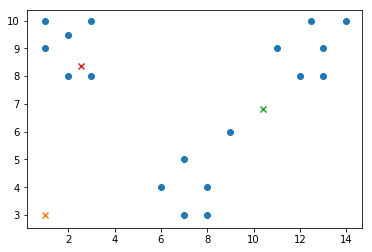

In [11]:
#we plot the data just to see what it looks like
plt.scatter(x = X.sepal_length, y = X.petal_length)

for index1 in range(len(updated_centroids)):
    plt.scatter(x = updated_centroids[index1][0], y = updated_centroids[index1][1], marker = 'x')
    
plt.show()
#The centroids will appear as Xs on the chart

Both Centroids 1 and 2 moved but Centroid 0 stayed where it was 

# Now we need to continually optimize the centroids by running closest centroid and update_centroids until the Centroids stopped "moving" or changing values

In [27]:
optimized_yet = False

while optimized_yet == False:
    
    y = []

    #This is our FOR loop from before
    for index in np.array(X):
        close_cen = closest_centroid(index, centroids)
        y.append(close_cen)
        
    # move the known assignment be the previous state, for post comparison
    old_c = centroids.copy()
    
    # Let's run update_centroid and re-write the previous value of centroids
    centroids = update_centroid(X[features], y, centroids) # Update the centroids
    print(centroids)
    
    # 6. Repeat steps 3 to 5 until the centroids do not change
    if old_c == centroids:
        optimized_yet = True

[[7.5, 4.166666666666667], [12.583333333333334, 9.0], [2.0, 9.083333333333334]]


# And our final plot looks like

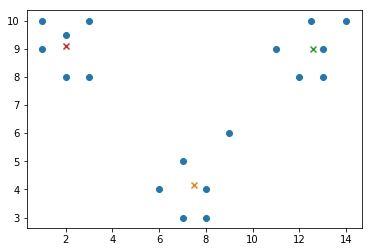

In [25]:
plt.scatter(x = X.sepal_length, y = X.petal_length)

for index1 in range(len(centroids)):
    plt.scatter(x = centroids[index1][0], y = centroids[index1][1], marker = 'x')
    
plt.show()
#The centroids will appear as Xs on the chart